# Imports

In [1]:
import torch
from torch import randint
import os
from PIL import Image
from torchmetrics.multimodal.clip_score import CLIPScore
import os
import cv2
from tqdm import tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torchvision

# Load the CLIP model

In [2]:
modelName = 'FLUX_SCHNELL_512'

model_name_or_path = ["openai/clip-vit-base-patch16",
                      "openai/clip-vit-base-patch32",
                      "openai/clip-vit-large-patch14-336",
                      "openai/clip-vit-large-patch14"]

metricList = [CLIPScore(model_name_or_path=model) for model in model_name_or_path]
print('metricList: ', len(metricList))

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

metricList:  4


# Load the inputs

In [3]:
input_prompt_file_path = '' # path to the prompt file 


if modelName == 'DALL-E_1024': 
    # DALL E images are available as .webp files, not in .pkl format
    input_image_path = '' # set the path to the DALL-E_1024 image files
    image_files_list = os.listdir(input_image_path)
    print(image_files_list)
    image_files = sorted(image_files_list, key=lambda x: int(x.split('.')[0]))
    print(image_files)

elif modelName == 'DALL-E_512':
    input_image_path = '' # set the path to the DALL-E_512 image files'
    image_files_list = os.listdir(input_image_path)
    print(image_files_list)
    image_files = sorted(image_files_list, key=lambda x: int(x.split('.')[0]))
    print(image_files)


elif modelName == 'SDXL_512':
    image_files = '' # set the path to the SDXL_512 pkl file
    with open(image_files, 'rb') as f:
        images = pickle.load(f)


elif modelName == 'SDXL_1024':
    image_files = '' # set the path to SDXL_1024 pkl file
    with open(image_files, 'rb') as f:
        images = pickle.load(f)

elif modelName == 'FLUX_SCHNELL_512':
    image_files = '' # set the path to the FLUX_SCHNELL_512 pkl file
    with open(image_files, 'rb') as f:
        images = pickle.load(f)

elif modelName == 'FLUX_SCHNELL_1024':
    image_files = '' # set the path to the FLUX_SCHNELL_1024 pkl file
    with open(image_files, 'rb') as f:
        images = pickle.load(f)

elif modelName == 'SDXL_TURBO_512':
    image_files = '' # set the path to the SDXL_TURBO_512 pkl file
    with open(image_files, 'rb') as f:
        images = pickle.load(f)

elif modelName == 'SDXL_TURBO_1024':
    image_files = '' # set the path to the SDXL_TURBO_1024 pkl file
    with open(image_files, 'rb') as f:
        images = pickle.load(f)

In [4]:
with open(input_prompt_file_path) as file:
    # add only those entries in the list from the prompt file that do not have '#' identifier
    prompt_list = [line.rstrip() for line in file if '#' not in line]

94
FLUX_SCHNELL_512 95 : A red apple, studio lighting


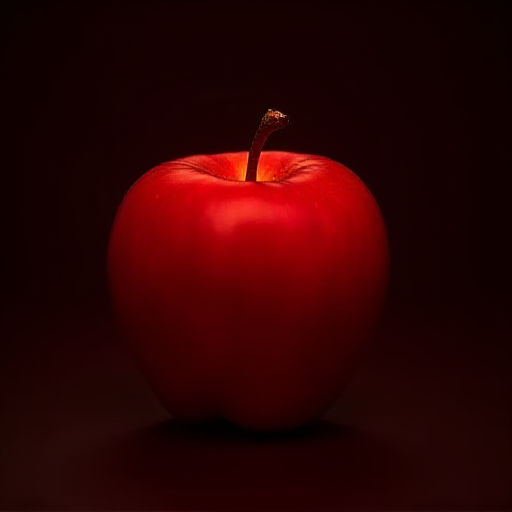

172
FLUX_SCHNELL_512 173 : Wide shot of a piano, studio lighting


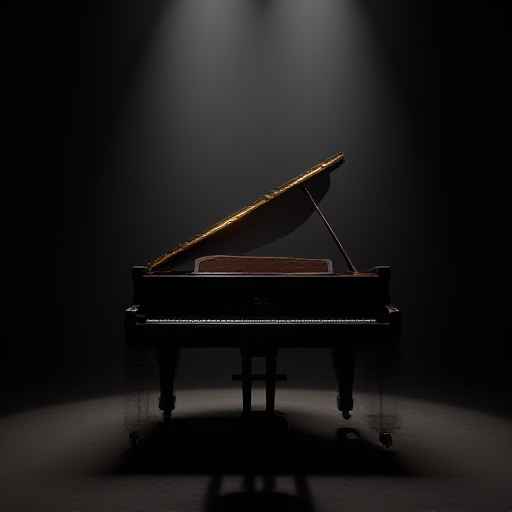

101
FLUX_SCHNELL_512 102 : A woman sitting in a chair, white studio background, profile shot


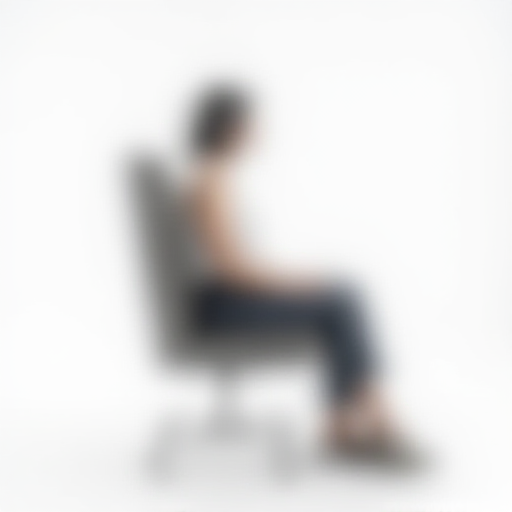

183
FLUX_SCHNELL_512 184 : A tent in a forest clearing, outdoor photograph


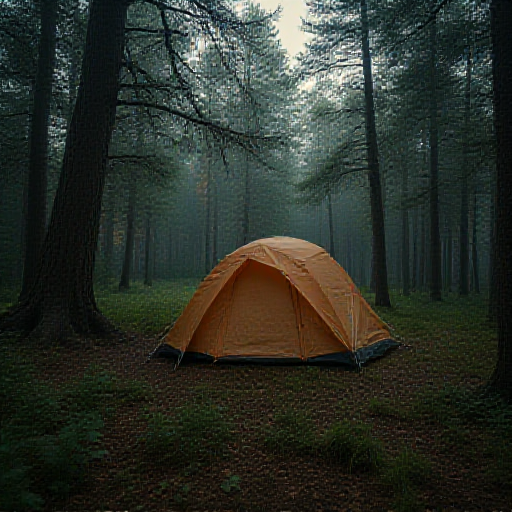

78
FLUX_SCHNELL_512 79 : closeup of a hand turning a key in a door, daylight, stock photography


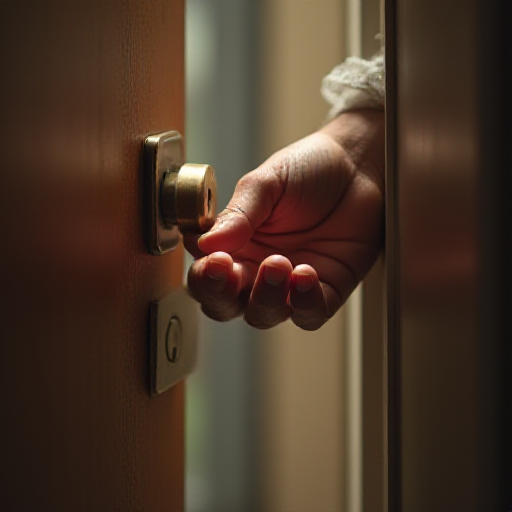

In [5]:
# check to ensure that the prompts are mapped correctly to the images for the computation of the clipscore in the next cells

if modelName =='DALL-E_512' or modelName == 'DALL-E_1024':
    count = 0
    for i in range(len(image_files)):
        integer = np.random.randint(len(image_files))
        print(integer)
        print(modelName + ' ' + prompt_list[integer])
        
        #image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        #pixels = np.array(image)

        if modelName == 'DALL-E_1024':
            im = Image.open(input_image_path+str(image_files[integer]))

        elif modelName == 'DALL-E_512':
            #im = im.resize((512, 512))
            im = Image.open(input_image_path+str(image_files[integer]))

            print('image size: ', im.size)
        else:
            print('image size: ', im.size)
        display(im)        
        count += 1
        if count == 5:
            break

else:
    count = 0
    for i in range(len(images)):
        integer = np.random.randint(len(images))
        print(integer)
        print(modelName + ' ' + prompt_list[integer])
        display(images[integer])
        count += 1
    
        if count == 5:
            break

In [6]:
clipScoreList = [] # list of list of 200 clipScore values for each of the 4 clipscore model
pixelTensorList = [] # tensor format of the 200 images
pixelList = []
count = 0

for i in tqdm(range(len(prompt_list))):
    #i = np.random.randint(len(prompt_list))
    entry = prompt_list[i].split(' : ')
    #print(entry[0] + '         ' + prompt_list[i])
    
    if modelName == 'DALL-E_512' or modelName == 'DALL-E_1024':
        
        #image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

        if modelName == 'DALL-E_1024':
            im = Image.open(input_image_path+str(image_files[i]))
            print('image size: ', im.size)

        elif modelName == 'DALL-E_512':
            #im = im.resize((512, 512))
            im = Image.open(input_image_path+str(image_files[i]))
            print('image size: ', im.size)
            
        #if modelName == 'DALL-E_512':
        #    image = cv2.resize(image, (512, 512))
        #    print('image size: ', image.shape)
            #display(Image.fromarray(image))
        #else:
        #    print('image size: ', image.shape)
        pixels = np.array(im)
        pixelList.append(pixels)
        pixelTensorList.append(torch.from_numpy(pixels))

    #elif modelName == 'SDXL':
        #print('SDXL')
    #    pixels = np.array(images[i])
        #display(pixels)
    #    pixelList.append(pixels)
    #    pixelTensorList.append(torch.from_numpy(pixels))

    #elif modelName == 'FLUX_SCHNELL':
    #    pixels = np.array(images[i])
        #display(pixels)
    #    pixelList.append(pixels)
    #    pixelTensorList.append(torch.from_numpy(pixels))
    else:
        pixels = np.array(images[i])
        print('pixels shape: ', pixels.shape)
        
        pixelList.append(pixels)
        pixelTensorList.append(torch.from_numpy(pixels))
    ##count += 1
    ##if count == 5:
    ##    break

  0%|          | 0/200 [00:00<?, ?it/s]

pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape: 

100%|██████████| 200/200 [00:00<00:00, 2161.50it/s]

pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape:  (512, 512, 3)
pixels shape: 

  0%|          | 0/4 [00:00<?, ?it/s]

metric:  openai/clip-vit-base-patch16



  0%|          | 0/200 [00:00<?, ?it/s]

1 : conductor conducting an orchestra, shot from behind
(512, 512, 3)


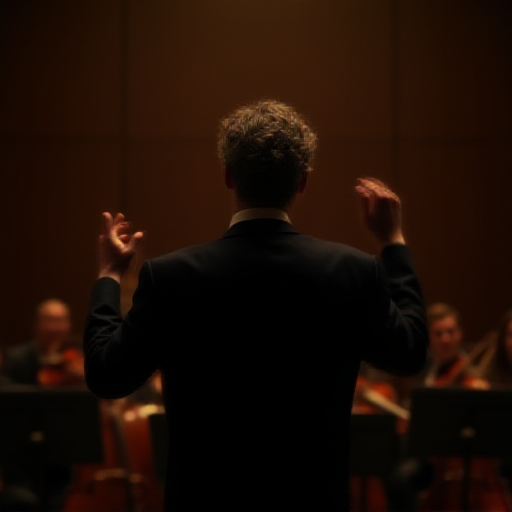

tensor([True])



  0%|          | 1/200 [00:00<02:55,  1.13it/s]

2 : a soldier saluting, news photograph
(512, 512, 3)


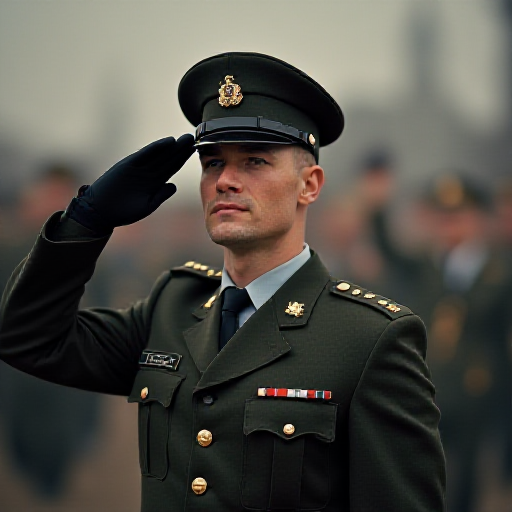

tensor([True])



  1%|          | 2/200 [00:01<02:24,  1.37it/s]

3 : road bicycle, studio lighting
(512, 512, 3)


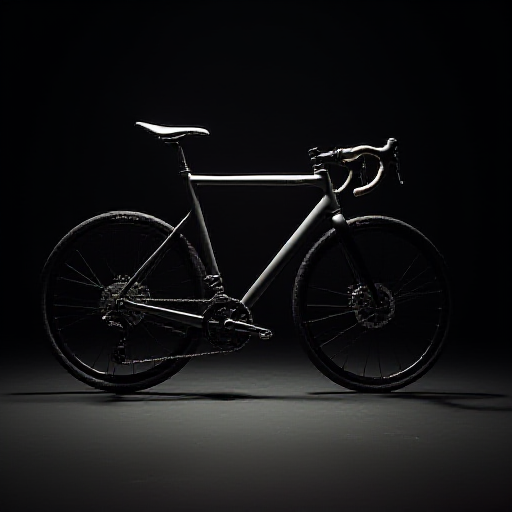

tensor([True])



 25%|██▌       | 1/4 [01:44<05:12, 104.14s/it]

metric:  openai/clip-vit-base-patch32



  0%|          | 0/200 [00:00<?, ?it/s]

1 : conductor conducting an orchestra, shot from behind
(512, 512, 3)


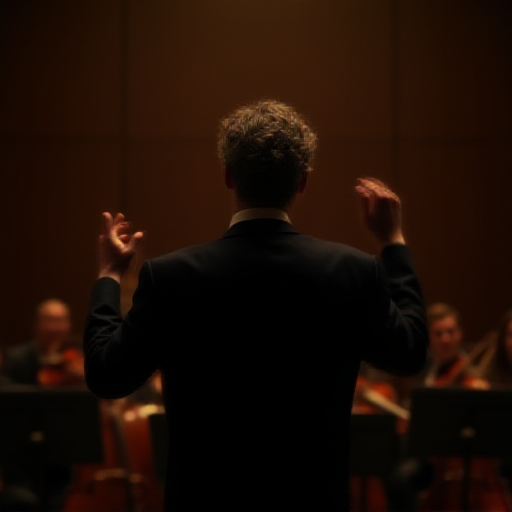

tensor([True])



  0%|          | 1/200 [00:00<00:58,  3.42it/s]

2 : a soldier saluting, news photograph
(512, 512, 3)


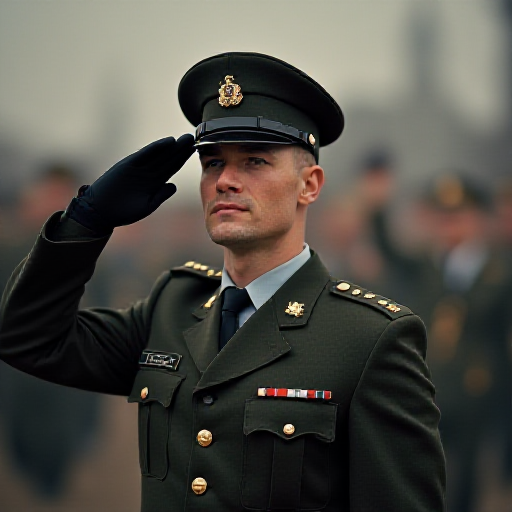

tensor([True])



  1%|          | 2/200 [00:00<00:55,  3.57it/s]

3 : road bicycle, studio lighting
(512, 512, 3)


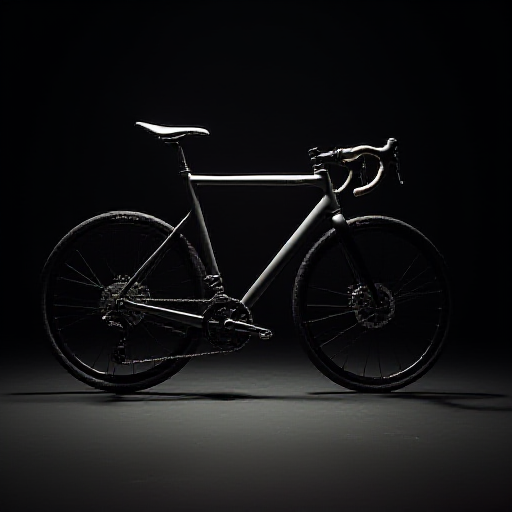

tensor([True])



 50%|█████     | 2/4 [02:35<02:26, 73.15s/it] 

metric:  openai/clip-vit-large-patch14-336



  0%|          | 0/200 [00:00<?, ?it/s]

1 : conductor conducting an orchestra, shot from behind
(512, 512, 3)


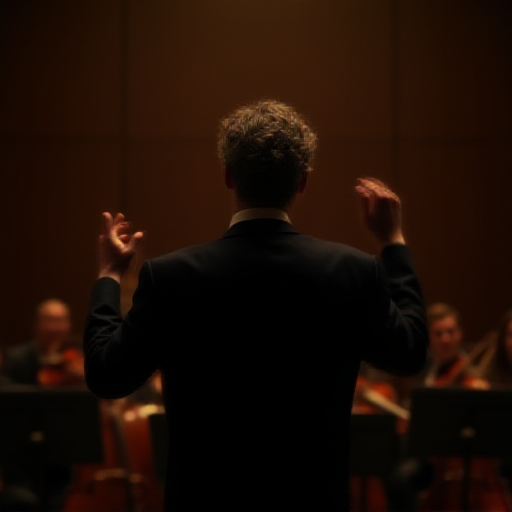

tensor([True])



  0%|          | 1/200 [00:04<16:10,  4.88s/it]

2 : a soldier saluting, news photograph
(512, 512, 3)


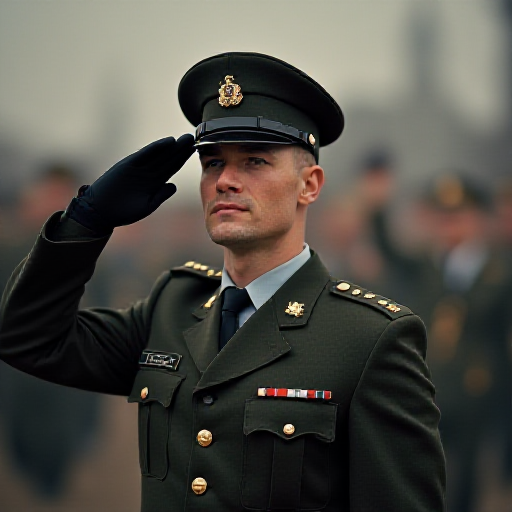

tensor([True])



  1%|          | 2/200 [00:09<16:13,  4.92s/it]

3 : road bicycle, studio lighting
(512, 512, 3)


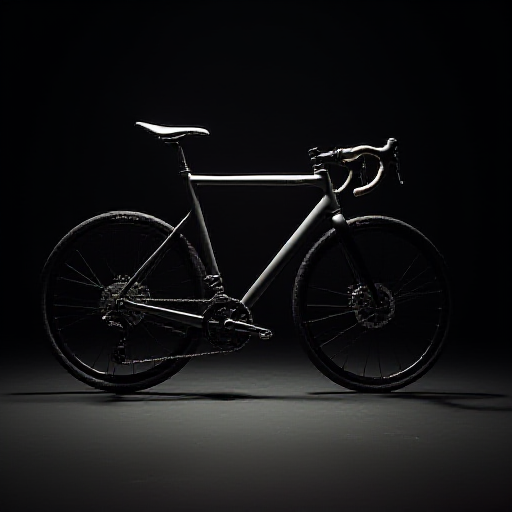

tensor([True])



 75%|███████▌  | 3/4 [16:03<06:48, 408.44s/it]

metric:  openai/clip-vit-large-patch14



  0%|          | 0/200 [00:00<?, ?it/s]

1 : conductor conducting an orchestra, shot from behind
(512, 512, 3)


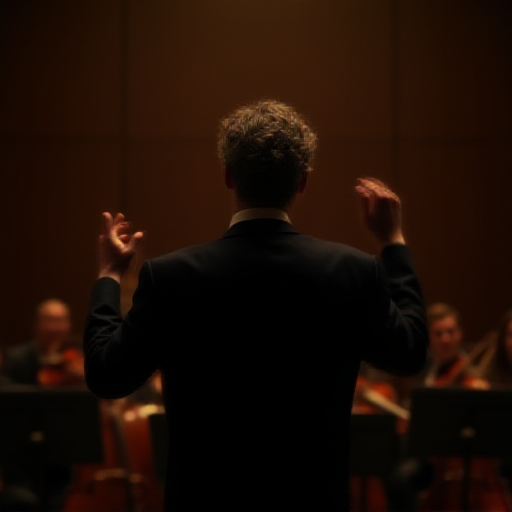

tensor([True])



  0%|          | 1/200 [00:02<07:44,  2.33s/it]

2 : a soldier saluting, news photograph
(512, 512, 3)


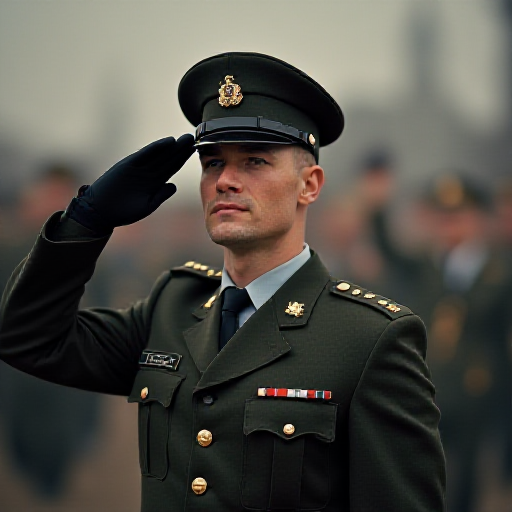

tensor([True])



  1%|          | 2/200 [00:04<06:51,  2.08s/it]

3 : road bicycle, studio lighting
(512, 512, 3)


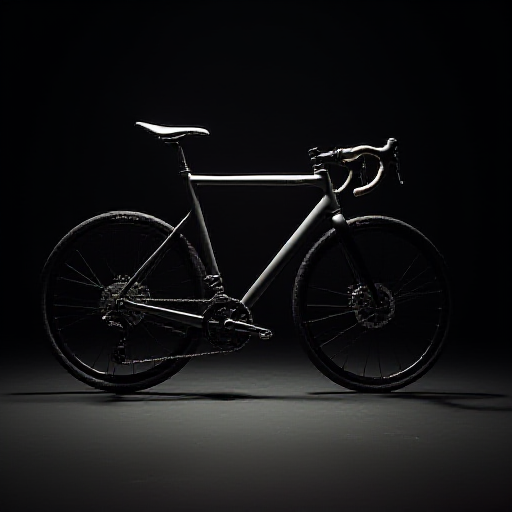

tensor([True])



100%|██████████| 4/4 [22:35<00:00, 338.90s/it]


In [7]:
for i in tqdm(range(len(metricList))):
    print('metric: ', model_name_or_path[i])
    count = 0 
    clip_score = [] # list of 200 clipScore values for each clipScore model
    for counter in tqdm(range(len(pixelTensorList))):
        if count < 3:
            print(prompt_list[count])
            print(pixelList[count].shape)
            display(Image.fromarray(pixelList[count]))
            unique = torch.unique(torch.eq(torch.from_numpy(pixelList[count]), pixelTensorList[count]))
            print(unique)
        score = metricList[i](pixelTensorList[counter], prompt_list[counter].split(' : ')[1])
        clip_score.append(score.detach().round())
        count += 1
    clipScoreList.append(clip_score)

In [8]:
# write a code to zip the model name and the clip score list as a key value pair in dictionary
# it is this dictionary that should then be saved as a pickle file

clipScoreDictionary = {}

for i in range(len(clipScoreList)):
    clipScoreDictionary[model_name_or_path[i]] = clipScoreList[i]

print(len(clipScoreDictionary))

for k, v in clipScoreDictionary.items():
    print(k)
    print(v)

4
openai/clip-vit-base-patch16
[tensor(32.), tensor(31.), tensor(31.), tensor(30.), tensor(36.), tensor(32.), tensor(35.), tensor(32.), tensor(35.), tensor(30.), tensor(30.), tensor(34.), tensor(32.), tensor(30.), tensor(31.), tensor(32.), tensor(32.), tensor(31.), tensor(30.), tensor(33.), tensor(33.), tensor(34.), tensor(34.), tensor(31.), tensor(34.), tensor(32.), tensor(35.), tensor(36.), tensor(36.), tensor(30.), tensor(34.), tensor(31.), tensor(35.), tensor(33.), tensor(31.), tensor(32.), tensor(29.), tensor(35.), tensor(32.), tensor(32.), tensor(27.), tensor(31.), tensor(26.), tensor(33.), tensor(33.), tensor(26.), tensor(33.), tensor(33.), tensor(29.), tensor(37.), tensor(28.), tensor(26.), tensor(35.), tensor(29.), tensor(33.), tensor(32.), tensor(33.), tensor(33.), tensor(33.), tensor(32.), tensor(28.), tensor(35.), tensor(36.), tensor(30.), tensor(37.), tensor(35.), tensor(34.), tensor(35.), tensor(29.), tensor(37.), tensor(37.), tensor(32.), tensor(36.), tensor(35.), tensor

# Download the clipscores of the generated images as a pickle file

In [9]:
import pickle

clipScoreFile = '' # path to write the clip score in a file 
with open(clipScoreFile+modelName+'.pkl', 'wb') as f:
    pickle.dump(clipScoreDictionary, f)

# References:
* https://lightning.ai/docs/torchmetrics/stable/multimodal/clip_score.html
* https://github.com/Lightning-AI/torchmetrics/blob/master/src/torchmetrics/multimodal/clip_score.py#L43-L179